### Background:
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.


### Objective: 
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

### Data Description:
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

### Steps to follow:
1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculate average silhouette score for both methods. (5 marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import zscore
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
credit_df = pd.read_excel(r"C:\Users\admin\Desktop\AIML\Project\Project 5\Credit Card Customer Data.xlsx")
credit_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
credit_df.shape

(660, 7)

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


All the columns are in interger format.

In [5]:
credit_df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

Good to see a dataset with no null values.

In [6]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


1. It is good to see that there are no missing values
2. Avg_Credit_Limit and Total_Credit_Cards cannot be 0 and it has atleast values.
3. Rest columns can be 0.

In [7]:
#since SL_No is not much important, we can drop it
credit_df.drop(columns='Sl_No', axis=1, inplace=True)
credit_df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [8]:
#checking customer key column
credit_df['Customer Key'].nunique()

655

Seems like Customer key is not unique. It has some duplicates

In [9]:
credit_df[credit_df.duplicated(['Customer Key'], keep=False)].sort_values(by='Customer Key')

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


5 customer keys are duplicated with different values. Merging as a unique record

In [10]:
cus_dup_first = credit_df[credit_df.duplicated(['Customer Key'],keep='last')]

In [11]:
credit_df.drop_duplicates(['Customer Key'],keep='last',inplace=True)
credit_df.shape

(655, 6)

In [12]:
credit_df1 = pd.concat([credit_df,cus_dup_first]).groupby(by='Customer Key',as_index=False).sum()
print(credit_df.shape)
credit_df1.head()

(655, 6)


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,11265,51000,7,3,2,0
1,11398,12000,6,5,2,1
2,11412,19000,2,2,3,4
3,11466,9000,7,5,0,0
4,11562,38000,4,3,2,0


Duplicate Customer Keys are merged into a single record.

In [13]:
#After merging duplicates into one record, validaing a sample one
credit_df1[credit_df1['Customer Key']==37252]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
193,37252,65000,10,2,3,10


In [14]:
#now we can remove customer key as well
credit_df1.drop(columns='Customer Key', axis=1, inplace=True)
credit_df1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,51000,7,3,2,0
1,12000,6,5,2,1
2,19000,2,2,3,4
3,9000,7,5,0,0
4,38000,4,3,2,0


In [15]:
# Check for missing value
credit_df1.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [16]:
credit_df1.nunique()

Avg_Credit_Limit       113
Total_Credit_Cards      12
Total_visits_bank        8
Total_visits_online     16
Total_calls_made        11
dtype: int64

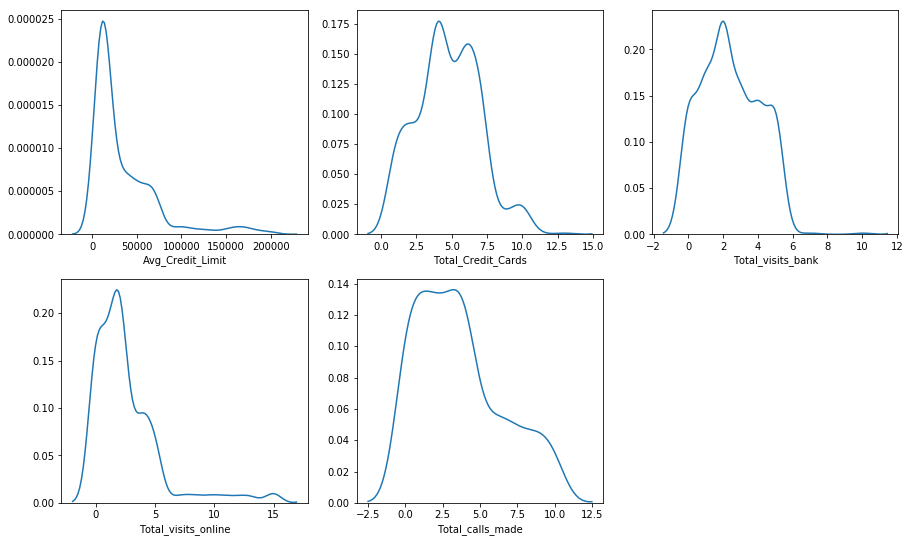

In [17]:
plt.figure(figsize=(15,14))
pos = 1
for i in credit_df1.columns:
    plt.subplot(3,3, pos)
    sns.distplot(credit_df1[i], hist=False)
    pos +=1

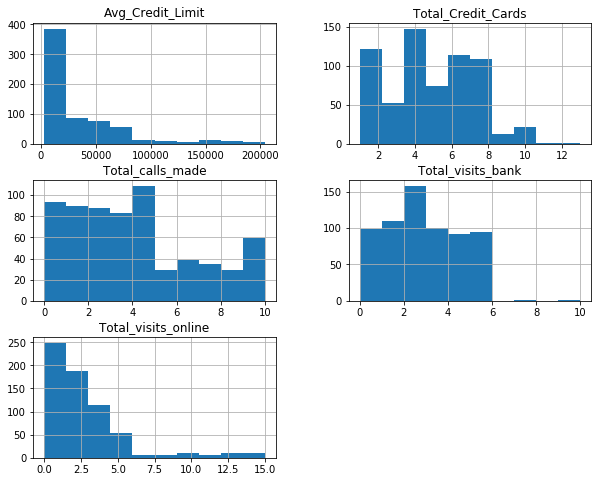

In [18]:
credit_df1.hist(figsize=(10,8))
plt.show()

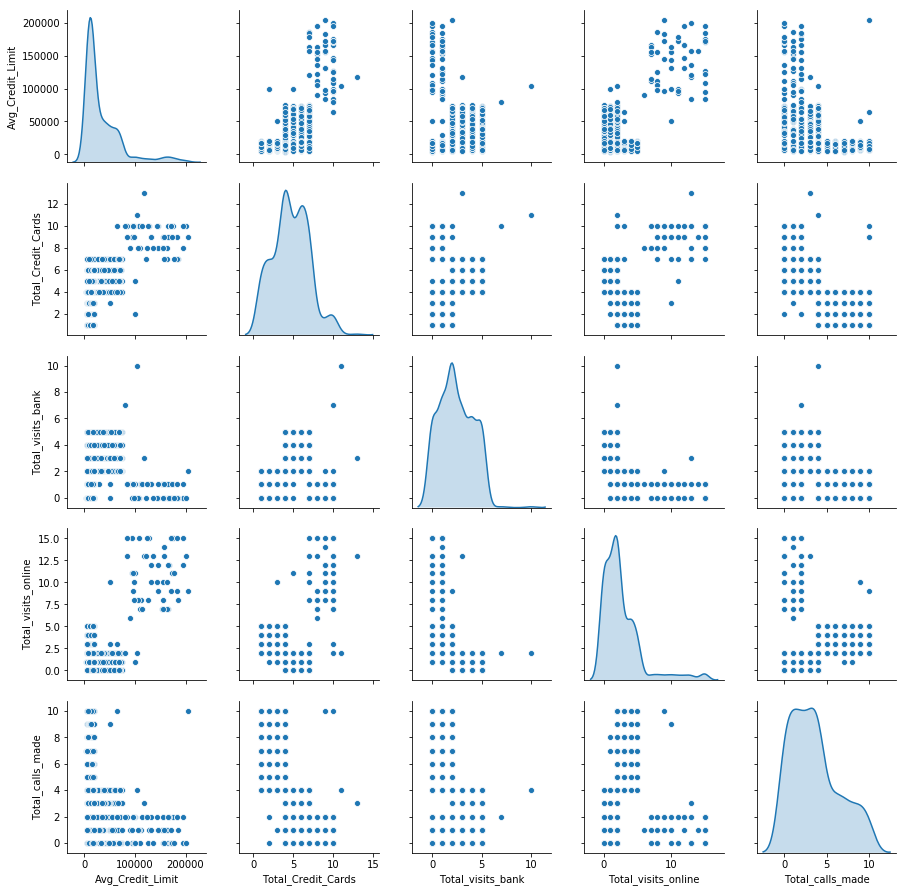

In [19]:
sns.pairplot(credit_df1, diag_kind='kde') 

1. As per above plots, no of clusters can be 2,3,4.
2. Avg_Credit_Limit is kind of proportional to Total_Credit_Cards and Total_visits_online:
    1. Customers with more average credit limit has visited online more compare to with customers with less average credit
    2. Same like Customers with more average credit limit has more credit card compare to with customers with less average credit
4. In most cases, if Total_visits_online increases, Total_Credit_Cards also increases

1. Columns like 'Average Credit Limit','Total Visits Online' have more outliers.
2. 'Total calls made' doesnt have any outliers.

In [20]:
#Creating a new column for average credit limit
def avg_credit_limit(credit_df1):
    if credit_df1["Avg_Credit_Limit"]<15000:
        return 1
    if credit_df1["Avg_Credit_Limit"]>=15000 and credit_df1["Avg_Credit_Limit"]<50000:
        return 2
    if credit_df1["Avg_Credit_Limit"]>=50000 and credit_df1["Avg_Credit_Limit"]<100000:
        return 3
    if credit_df1["Avg_Credit_Limit"]>=100000 and credit_df1["Avg_Credit_Limit"]<500000:
        return 4
credit_df1['Avg_Crd_Lmt_Range']= credit_df1.apply(lambda credit_df1:avg_credit_limit(credit_df1) , axis=1)

In [21]:
credit_df1.groupby('Avg_Crd_Lmt_Range')[['Avg_Credit_Limit']].count()

,Avg_Credit_Limit
Avg_Crd_Lmt_Range,
1,257
2,238
3,117
4,43


Cutomers with high credit limit are less in number. People with credit limit less than 50000 are high in number.

In [22]:
credit_df1.groupby('Avg_Crd_Lmt_Range')[['Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].sum()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Crd_Lmt_Range,,,,
1,949,533,635,1261
2,1093,654,427,800
3,690,361,205,246
4,374,38,453,58


In [23]:
credit_df1.groupby('Avg_Crd_Lmt_Range')[['Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].mean()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Crd_Lmt_Range,,,,
1,3.692607,2.073930,2.470817,4.906615
2,4.592437,2.747899,1.794118,3.361345
3,5.897436,3.085470,1.752137,2.102564
4,8.697674,0.883721,10.534884,1.348837


1. Even with less number to customers, people with high credit limit has more credit cards and used online banking. But they havent visited the bank directly in much.
2. People with less credit limit visited bank more and made calls more. But they used online in less number.

So, When credit limit is high, the no.of credit care and online usage is high. When credit limit is less, bank visit and calls made are high.

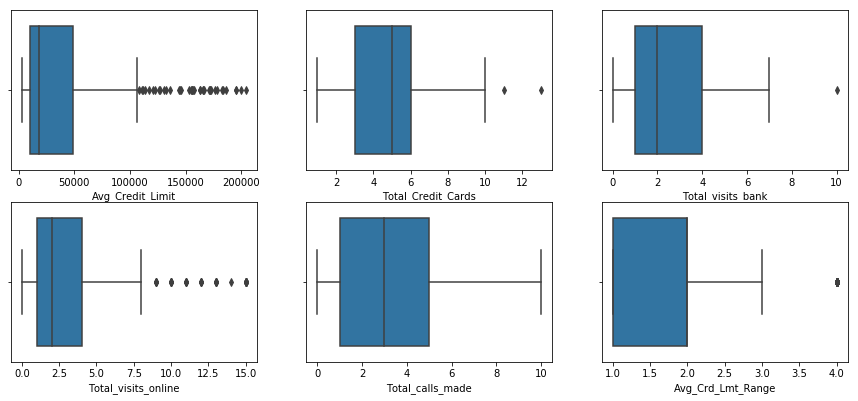

In [24]:
#After removing outliers
plt.figure(figsize=(15,10))
pos = 1
for i in credit_df1.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(credit_df1[i])
    pos += 1 

1. Columns like 'Average Credit Limit', 'Total Visits Online' have more outlier
2. 'Total Credit Cards', 'Total visits bank' have outliers but less in count.

In [25]:
#Handling outliers using IQR score
out_col = np.array([])
for i in credit_df1.drop(columns='Avg_Crd_Lmt_Range').columns:
    Q25 = credit_df1[i].quantile(0.25)
    Q75 = credit_df1[i].quantile(0.75)
    IQR = Q75 - Q25
    outliers_count = credit_df1[i][((credit_df1[i]<(Q25-1.5*IQR))|(credit_df1[i]>(Q75+1.5*IQR)))]
    if(len(outliers_count)>0):
        out_col = np.append(out_col,i)
        print("Outliers present in",i,"is",len(outliers_count))

Outliers present in Avg_Credit_Limit is 39
Outliers present in Total_Credit_Cards is 2
Outliers present in Total_visits_bank is 1
Outliers present in Total_visits_online is 38


In [26]:
credit_df2 = credit_df1.copy()
q25 = credit_df2.quantile(0.25)
q75 = credit_df2.quantile(0.75)
iqr = q75 - q25
for i, j in zip(np.where(credit_df2<q25-1.5*iqr)[0],np.where(credit_df2<q25-1.5*iqr)[1]):
    val = q25-1.5*iqr
    credit_df2.iloc[i,j] = val[j]
for i,j in zip(np.where(credit_df2>q75+1.5*iqr)[0],np.where(credit_df2>q75+1.5*iqr)[1]):    
    val = q75+1.5*iqr
    credit_df2.iloc[i,j]=val[j]

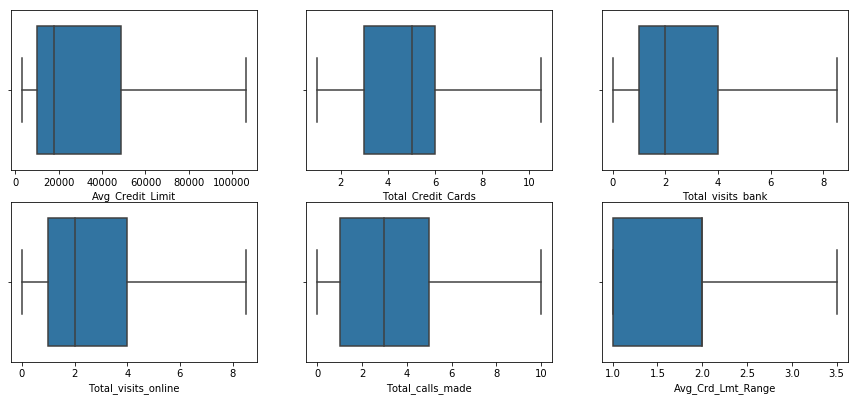

In [27]:
#After removing outliers
plt.figure(figsize=(15,10))
pos = 1
for i in credit_df2.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(credit_df2[i])
    pos += 1 

Outliers are handled for all the columns using IQR method.

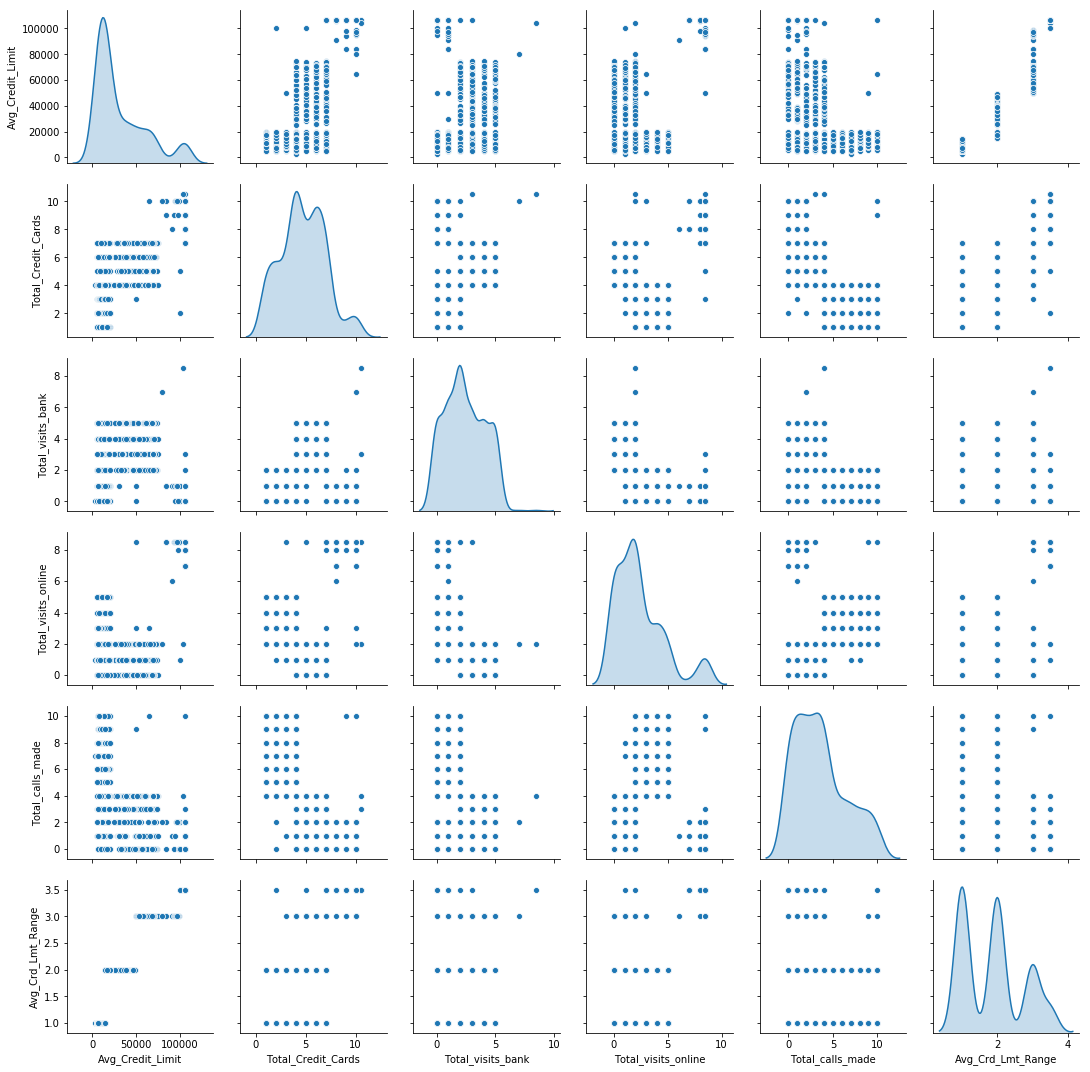

In [28]:
sns.pairplot(credit_df2, diag_kind='kde')

In [29]:
#dropping aavg_crd_lmt_range column
credit_df2.drop('Avg_Crd_Lmt_Range',axis=1,inplace=True)

In [30]:
#Scaling the data using zscore
credit_df2_z = credit_df2.apply(zscore)
credit_df2_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.659056,1.022322,0.352667,-0.182746,-1.259182
1,-0.689490,0.570486,1.566841,-0.182746,-0.910444
2,-0.447443,-1.236858,-0.254421,0.258947,0.135768
3,-0.793224,1.022322,1.566841,-1.066133,-1.259182
4,0.209541,-0.333186,0.352667,-0.182746,-1.259182


In [31]:
#Trying PCA
cred_df_z = credit_df2_z.copy()
pca = PCA(n_components=5)
pca.fit(cred_df_z)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
print("Variance:", pca.explained_variance_)
print("Variance Ratio:", pca.explained_variance_ratio_)

Variance: [2.34669425 1.71602331 0.36181782 0.30827893 0.27483095]
Variance Ratio: [0.4686223  0.34268069 0.07225309 0.06156166 0.05488227]


Seems like there is no use in dimension reduction in this dataset.
Atleast to get 95% of data, we need 4D structure. 

### Execute K-means clustering use elbow plot and analyse clusters using boxplot 

Finding no.of clusters using elbow plot

In [33]:
cluster_range=range(1,10)
mean=[]

for k in cluster_range:
    model=KMeans(n_clusters=k)
    model.fit(credit_df2_z)
    prediction=model.predict(credit_df2_z)
    mean.append(sum(np.min(cdist(credit_df2_z, model.cluster_centers_, 'euclidean'), axis=1)) / credit_df2_z.shape[0])



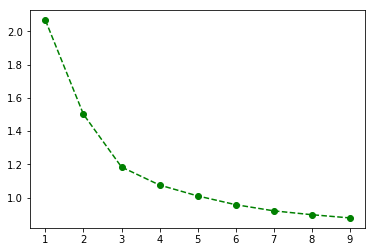

In [34]:
plt.plot(cluster_range,mean,'go--')

Mend is not clear. So, lets consider k values from 3,4 and 5

In [35]:
#Silhoutte score for cluster range from 2 to 9

for i in range(2,10):
    
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(credit_df2_z)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(credit_df2_z, cluster_labels)
    print("For n_clusters(k)={0}, the silhouette score is {1}".format(i, silhouette_avg))
    

For n_clusters(k)=2, the silhouette score is 0.4155620495535937
For n_clusters(k)=3, the silhouette score is 0.5122824417935609
For n_clusters(k)=4, the silhouette score is 0.37881213535379143
For n_clusters(k)=5, the silhouette score is 0.3469515586596595
For n_clusters(k)=6, the silhouette score is 0.26720965211020786
For n_clusters(k)=7, the silhouette score is 0.2653224300604409
For n_clusters(k)=8, the silhouette score is 0.2519129795603127
For n_clusters(k)=9, the silhouette score is 0.23903249107177316


In [36]:
#k=3

model_k1 = KMeans(n_clusters=3,random_state=10)
model_k1.fit(credit_df2_z)
predict = model_k1.predict(credit_df2_z)
credit_df2["Labels"] = predict
credit_df2_z["Labels"] = predict
credit_df2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,51000.0,7.0,3.0,2.0,0,0
1,12000.0,6.0,5.0,2.0,1,0
2,19000.0,2.0,2.0,3.0,4,1
3,9000.0,7.0,5.0,0.0,0,0
4,38000.0,4.0,3.0,2.0,0,0


In [37]:
credit_df2.groupby(['Labels'])['Labels'].count()

Labels
0    383
1    222
2     50
Name: Labels, dtype: int64

In [38]:
credit_df2.groupby(['Labels']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
0,34018.276762,5.549608,3.505222,0.992167,2.036554
1,12180.180180,2.405405,0.936937,3.560811,6.851351
2,103755.000000,8.870000,0.680000,8.210000,1.280000


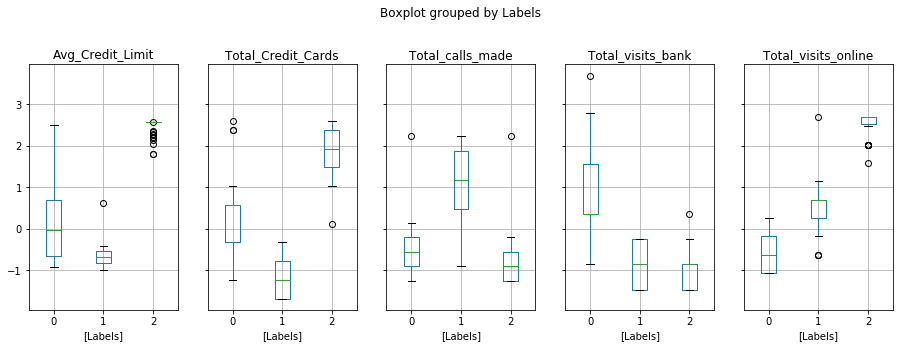

In [39]:
credit_df2_z.boxplot(by='Labels', layout = (2,5),figsize=(15,10))
plt.show()

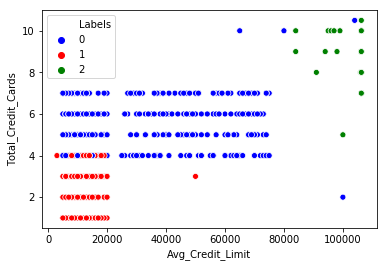

In [40]:
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards', data=credit_df2,hue = 'Labels',
                palette={0:'blue',1:'red',2:'green'})

In [41]:
#k=4

model_k2 = KMeans(n_clusters=4,random_state=10)
model_k2.fit(credit_df2_z)
predict = model_k2.predict(credit_df2_z)
credit_df2["Labels"] = predict
credit_df2_z["Labels"] = predict
credit_df2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,51000.0,7.0,3.0,2.0,0,1
1,12000.0,6.0,5.0,2.0,1,3
2,19000.0,2.0,2.0,3.0,4,0
3,9000.0,7.0,5.0,0.0,0,3
4,38000.0,4.0,3.0,2.0,0,3


In [42]:
credit_df2.groupby(['Labels'])['Labels'].count()

Labels
0    222
1    159
2     50
3    224
Name: Labels, dtype: int64

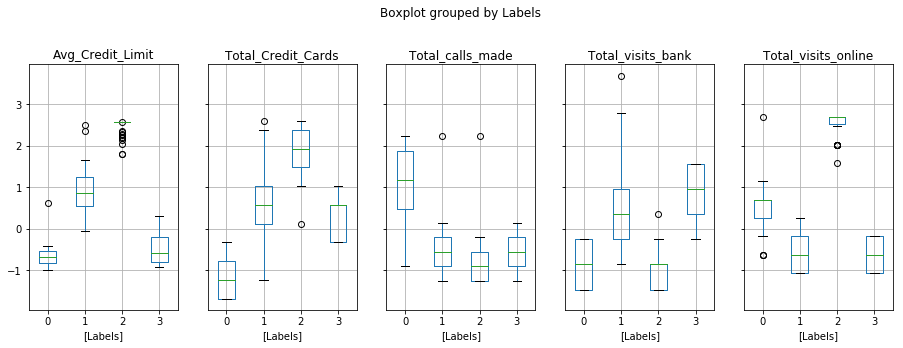

In [43]:
credit_df2_z.boxplot(by='Labels', layout = (2,5),figsize=(15,10))
plt.show()

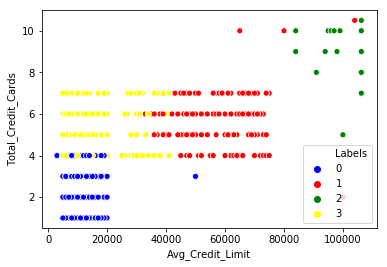

In [44]:
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards', data=credit_df2,hue = 'Labels',
                palette={0:'blue',1:'red',2:'green',3:'yellow'})

In [45]:
#k=5

model_k2 = KMeans(n_clusters=5,random_state=10)
model_k2.fit(credit_df2_z)
predict = model_k2.predict(credit_df2_z)
credit_df2["Labels"] = predict
credit_df2_z["Labels"] = predict
credit_df2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,51000.0,7.0,3.0,2.0,0,2
1,12000.0,6.0,5.0,2.0,1,0
2,19000.0,2.0,2.0,3.0,4,1
3,9000.0,7.0,5.0,0.0,0,0
4,38000.0,4.0,3.0,2.0,0,4


In [46]:
credit_df2.groupby(['Labels'])['Labels'].count()

Labels
0    129
1    222
2    159
3     50
4     95
Name: Labels, dtype: int64

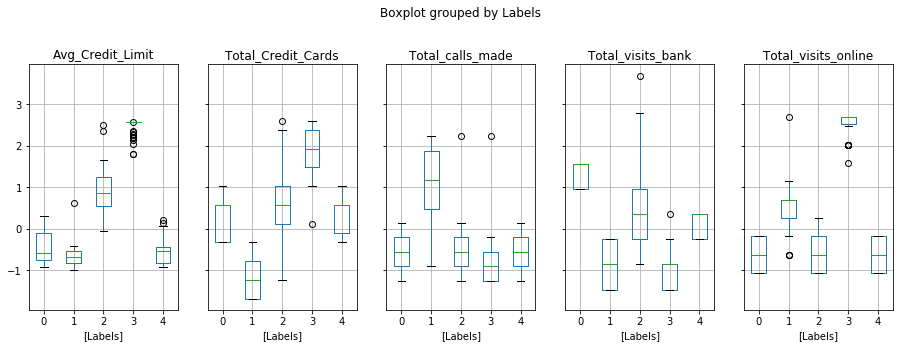

In [47]:
credit_df2_z.boxplot(by='Labels', layout = (2,5),figsize=(15,10))
plt.show()

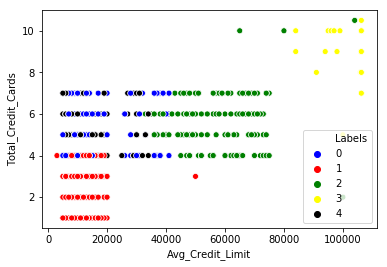

In [48]:
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards', data=credit_df2,hue = 'Labels',
                palette={0:'blue',1:'red',2:'green',3:'yellow',4:'black'})

### Hierarchical clustering with different linkages with the help of dendrogram and cophenetic coeff. 

1. Agglomerative clustering: Considering each data as single cluster and each are merged into a clusters based on the similarity between them.
2. Divisive clustering: One big cluster considering all data poits within it and big cluster is divided into two clusters and it continious. 

In [49]:
model_h1 = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')
model_h1.fit(credit_df2_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=2, pooling_func='deprecated')

In [50]:
#Assigning labels 
credit_df2['Labels'] = model_h1.labels_
credit_df2_z['Labels'] = model_h1.labels_
credit_df2.groupby(['Labels'])['Labels'].count()

Labels
0    604
1     51
Name: Labels, dtype: int64

In [51]:
#Silhoutte score for cluster range from 2 to 9
#credit_df2_z.drop(columns='Labels', axis=1, inplace=True)
for i in range(2,10):
    
    hclust = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='average')
    hclust.fit(credit_df2_z)
    
    cluster_labels = hclust.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(credit_df2_z, cluster_labels)
    print("For n_clusters(k)={0}, the silhouette score is {1}".format(i, silhouette_avg))
    

For n_clusters(k)=2, the silhouette score is 0.524989184919559
For n_clusters(k)=3, the silhouette score is 0.4656673630722239
For n_clusters(k)=4, the silhouette score is 0.4386118739287334
For n_clusters(k)=5, the silhouette score is 0.3234864137701823
For n_clusters(k)=6, the silhouette score is 0.4704082312997865
For n_clusters(k)=7, the silhouette score is 0.4357966786830752
For n_clusters(k)=8, the silhouette score is 0.4316402141153769
For n_clusters(k)=9, the silhouette score is 0.34574122398835455


In [52]:
credit_df2.groupby(['Labels']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
0,25940.397351,4.386589,2.563742,1.932947,3.793046
1,102995.098039,8.892157,0.705882,8.107843,1.450980


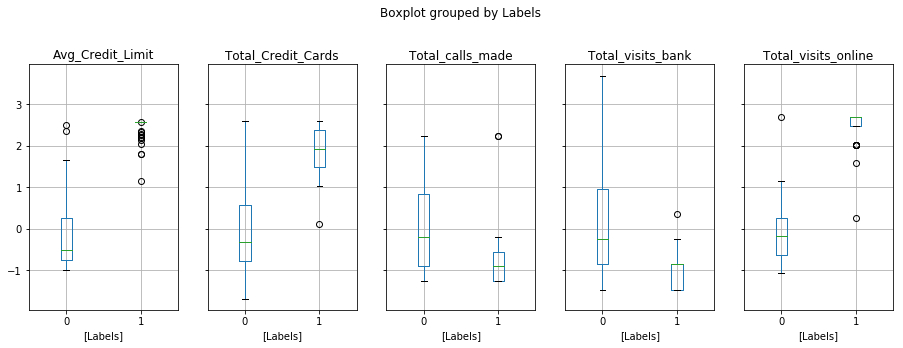

In [53]:
credit_df2_z.boxplot(by='Labels', layout = (2,5),figsize=(15,10))
plt.show()

### Cophenetic coefficient:

cophenet(Z,Y) computes the cophenetic correlation coefficient for the hierarchical cluster tree represented by Z. 
Z - output of the linkage function. 
Y - distances used to construct Z(output by the pdist function)

In [54]:
#Checking cophenetic coefficient for method single
Z = linkage(credit_df2_z, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(credit_df2_z))

print("Cophenetic correlation coefficient for method single",round(c,2)*100)

Cophenetic correlation coefficient for method single 69.0


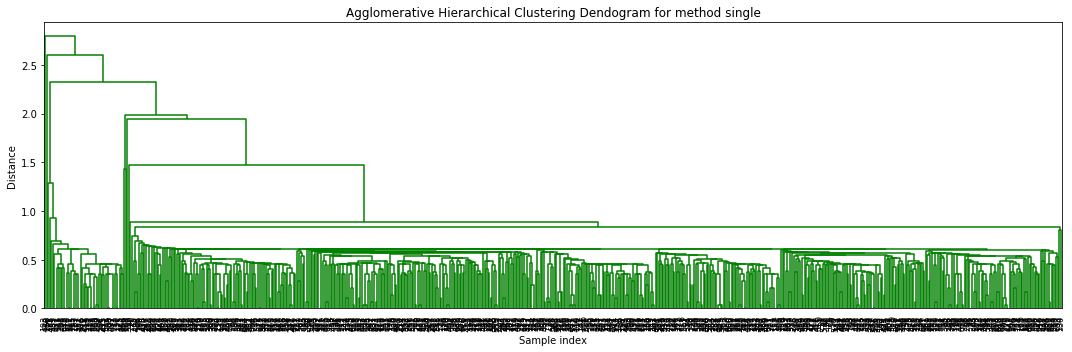

In [55]:
plt.figure(figsize=(15, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram for method single')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

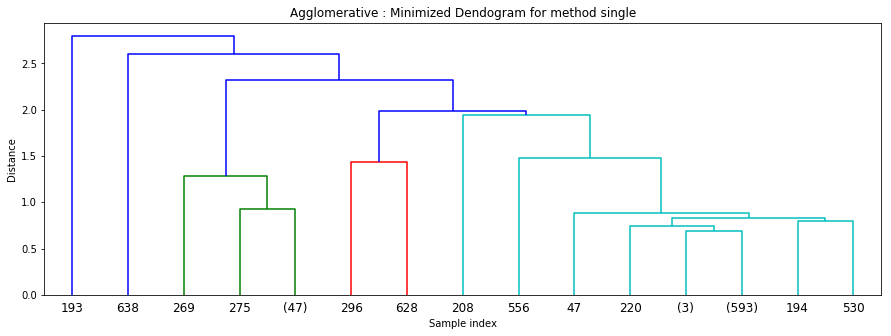

In [56]:
#minimized dendrogram 
plt.figure(figsize=(15,5))
plt.title('Agglomerative : Minimized Dendogram for method single')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode="lastp", p = 15, show_leaf_counts= True)
plt.show()

Method = complete

In [57]:
#Checking cophenetic coefficient for method single
Z = linkage(credit_df2_z, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(credit_df2_z))

print("Cophenetic correlation coefficient for method complete",round(c,2)*100)

Cophenetic correlation coefficient for method complete 88.0


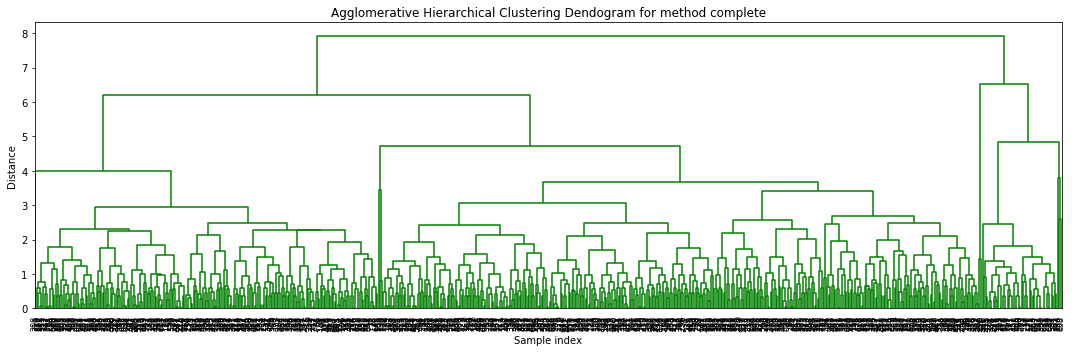

In [58]:
plt.figure(figsize=(15, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram for method complete')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

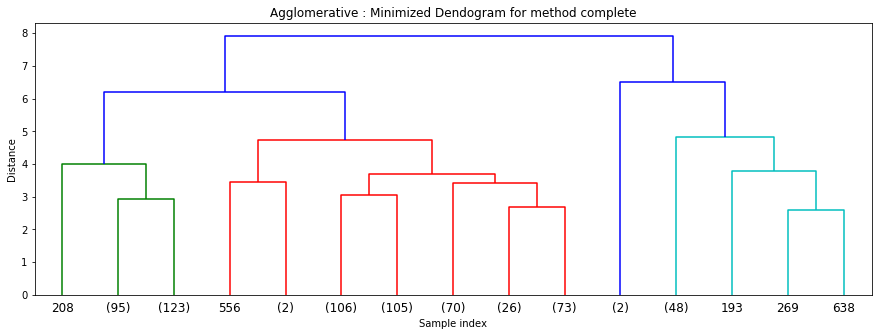

In [59]:
#minimized dendrogram 
plt.figure(figsize=(15,5))
plt.title('Agglomerative : Minimized Dendogram for method complete')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode="lastp", p = 15, show_leaf_counts= True)
plt.show()

method = average

In [60]:
#Checking cophenetic coefficient for method single
Z = linkage(credit_df2_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(credit_df2_z))

print("Cophenetic correlation coefficient for method complete",round(c,2)*100)

Cophenetic correlation coefficient for method complete 90.0


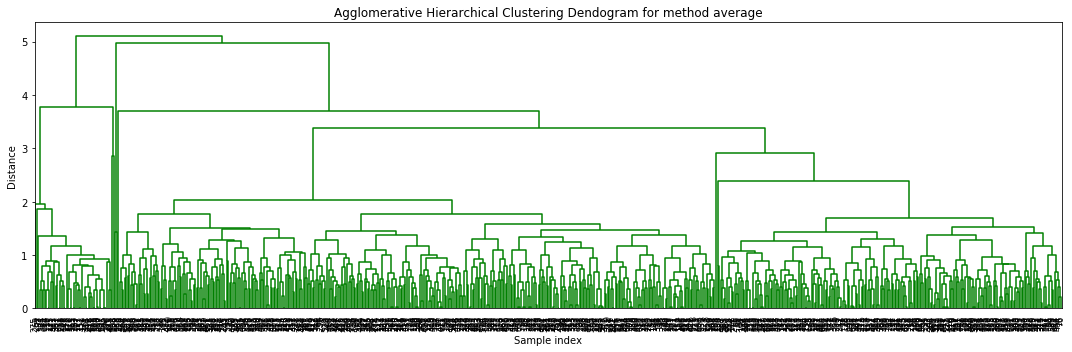

In [61]:
plt.figure(figsize=(15, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram for method average')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

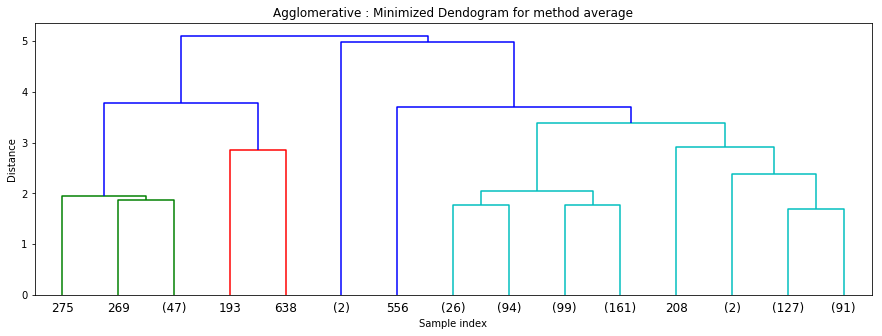

In [62]:
#minimized dendrogram 
plt.figure(figsize=(15,5))
plt.title('Agglomerative : Minimized Dendogram for method average')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode="lastp", p = 15, show_leaf_counts= True)
plt.show()

method = centroid

In [63]:
#Checking cophenetic coefficient for method centroid
Z = linkage(credit_df2_z, metric='euclidean', method='centroid')
c, coph_dists = cophenet(Z , pdist(credit_df2_z))

print("Cophenetic correlation coefficient for method complete",round(c,2)*100)

Cophenetic correlation coefficient for method complete 89.0


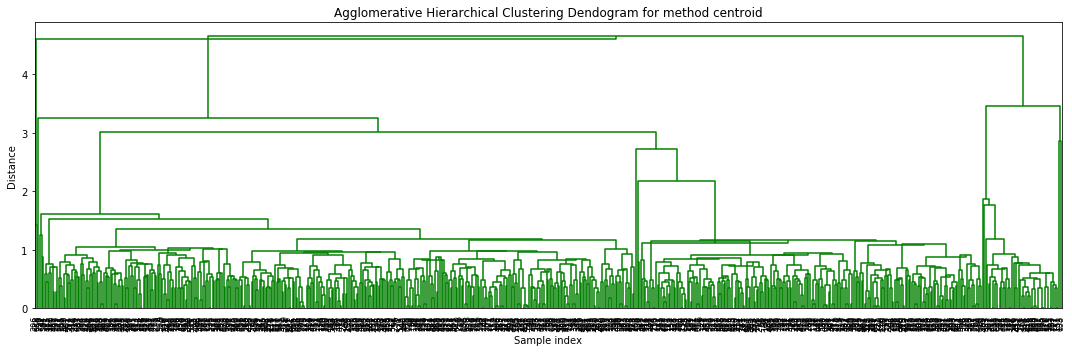

In [64]:
plt.figure(figsize=(15, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram for method centroid')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

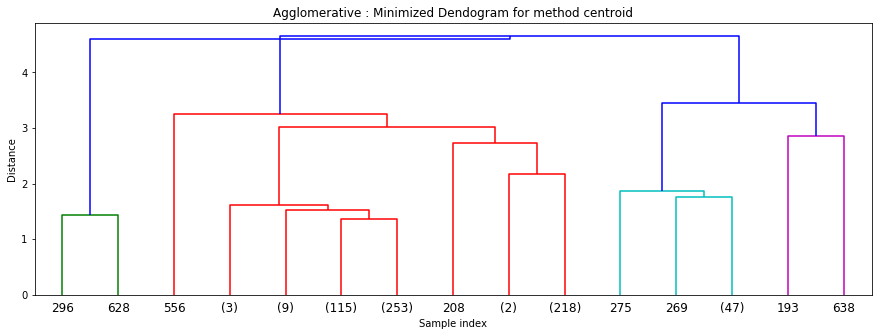

In [65]:
#minimized dendrogram 
plt.figure(figsize=(15,5))
plt.title('Agglomerative : Minimized Dendogram for method centroid')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode="lastp", p = 15, show_leaf_counts= True)
plt.show()

method = ward

In [66]:
#Checking cophenetic coefficient for method ward
Z = linkage(credit_df2_z, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(credit_df2_z))

print("Cophenetic correlation coefficient for method ward",round(c,2)*100)

Cophenetic correlation coefficient for method ward 75.0


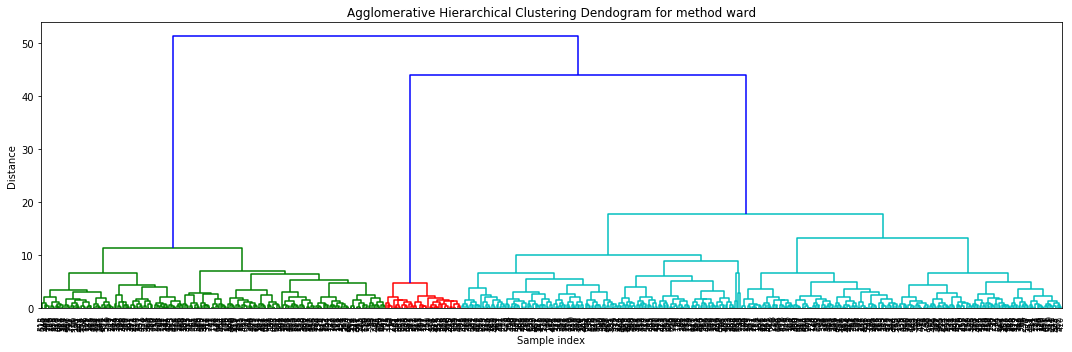

In [67]:
plt.figure(figsize=(15, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram for method ward')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

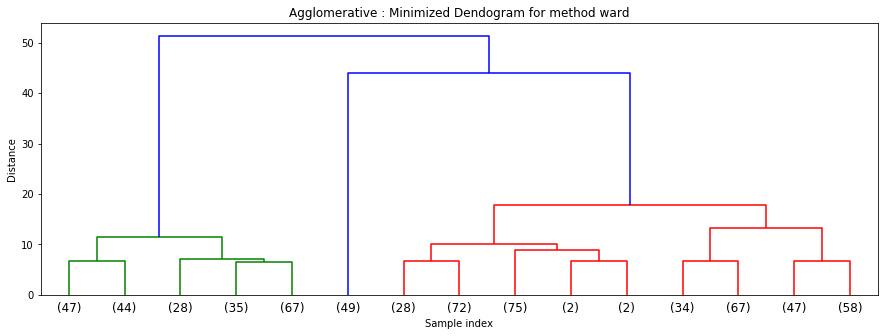

In [68]:
#minimized dendrogram 
plt.figure(figsize=(15,5))
plt.title('Agglomerative : Minimized Dendogram for method ward')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode="lastp", p = 15, show_leaf_counts= True)
plt.show()

From above different linkages, method='average' shows quite good improvement in cophenetic correlation

In [69]:
#Checking cophenetic coefficient for method average
Z = linkage(credit_df2_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(credit_df2_z))

print("Cophenetic correlation coefficient for method complete",round(c,2)*100)

Cophenetic correlation coefficient for method complete 90.0


In [70]:
#Silhoutte score for cluster range from 2 to 9

for i in range(2,9):
    
    agg=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='average')
    agg.fit(credit_df2_z)
    
    cluster_labels = agg.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(credit_df2_z, cluster_labels)
    print("For n_clusters(k)={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters(k)=2, the silhouette score is 0.524989184919559
For n_clusters(k)=3, the silhouette score is 0.4656673630722239
For n_clusters(k)=4, the silhouette score is 0.4386118739287334
For n_clusters(k)=5, the silhouette score is 0.3234864137701823
For n_clusters(k)=6, the silhouette score is 0.4704082312997865
For n_clusters(k)=7, the silhouette score is 0.4357966786830752
For n_clusters(k)=8, the silhouette score is 0.4316402141153769


In [71]:
model_h2 = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')
model_h2.fit(credit_df2_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=2, pooling_func='deprecated')

In [72]:
#Assigning labels 
credit_df2['Labels'] = model_h2.labels_
credit_df2_z['Labels'] = model_h2.labels_
credit_df2.groupby(['Labels'])['Labels'].count()

Labels
0    604
1     51
Name: Labels, dtype: int64

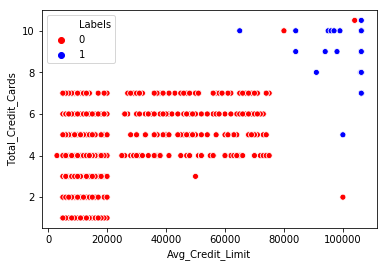

In [73]:
sns.scatterplot(x='Avg_Credit_Limit',y='Total_Credit_Cards',hue='Labels', palette={0:'red',1:'blue'},data=credit_df2)
plt.show()

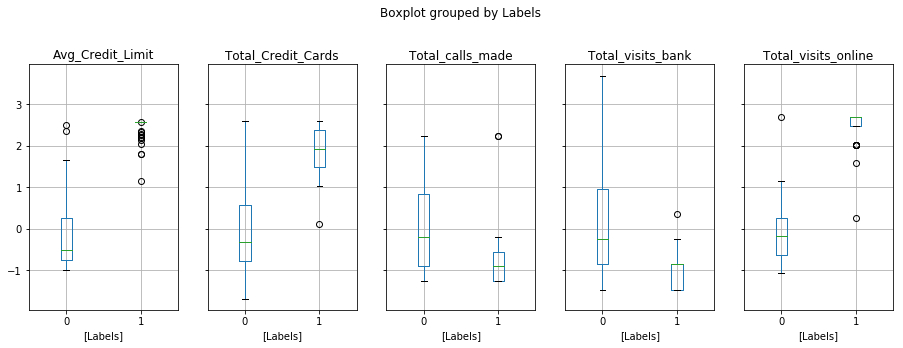

In [74]:
credit_df2_z.boxplot(by='Labels', layout = (2,5),figsize=(15,10))
plt.show()

KMeans: 
As per elbow plot, we validated for cluster 3,4,5.
1. Even though, all the 3,4,5 clusters are overlapped with columns with one another with different labels, it is kind of difficult to find the exact cluster where there is no overlap in the columns. 
2. but K=3 has maximum silhoutte score compared to 4 and 5.

Hierarichal clustering: 
Roughly validated for n_clusters = 2,3,4,5
1. Like KMeans, all the clusters are overlapped with columns with one another with different labels, it is kind of difficult to find the exact cluster where there is no overlap in the columns. 
2. As checked for all linkage methods, method='average' has high cophenetic correlation.
3. Also, the interesting thing is K=2 has maximum silhoutte score compared to others and overlap percentage is also low.

Analysis the clusters formed, tell us how is one cluster different from another:

1. How many different segments of customers are there?

As per my understanding when it comes to banking sector in most of the cases, the customers are 2 segments.
    1. who are ready to buy/use the product
    2. who are not ready to buy/use the product

Here also there may be 2 different segment of customers

2. How are these segments different from each other?

As said in question 1, 
    1. who are ready to buy/use the product - They produce profit for the bank
    2. who are not ready to buy/use the product - There is no profit to bank because of people in this segment.
    
Here, 
Average credit limit: 
    1. New customers.
    2. Old customers: with high limit and with low limit

Total credit card:
    1. Customers with less no. of credit card
    2. Customers with more credit card

Total online/bank visit:
    1. Customers who use online or visit bank
    2. Customers who doesnt use online or visit bank
    

3. What are your recommendations to the bank on how to better market to and service these customers?

    1. Bank may provide flat rate or percentage discount on their first purchase to bring more new customers.
    2. Bank could provide discounts, cash backs, reward points on purchase of products from the stores linked to bank.
    3. Credit card interest rate or yearly maintaince charge can be reduce.
    4. Based on their credit limit, bank can also provide loan to customers.
    5. Bank should also try contact customers via message or call in quaterly basis.
    6. Credit limit can be improved to get more customers
    7. In dataset, usage of online is very less. It may be due to they dont have online acces to their account. So, bank should provide online access to all credit card users.